In [1]:
#importing all the neccesary libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from wordcloud import WordCloud
import warnings

In [2]:
#importing the movie lens dataset directly to colab
!wget --no-check-certificate https://files.grouplens.org/datasets/movielens/ml-25m.zip


--2023-02-15 09:10:46--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip.1’

ml-25m.zip.1        100%[===================>] 249.84M  29.0MB/s    in 9.5s    

2023-02-15 09:10:56 (26.4 MB/s) - ‘ml-25m.zip.1’ saved [261978986/261978986]



In [3]:
#unzipping the data to read the csv's
local_zip = '/content/ml-25m.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/')
zip_ref.close()

In [4]:
#consist of ratings
rating_df = pd.read_csv('/ml-25m/ratings.csv')

#consist of movies
movies_df = pd.read_csv('/ml-25m/movies.csv')

#consist of genres
genres_df = pd.read_csv('genres.csv')


In [5]:
genre_list = genres_df['genre_name'].tolist()
genre_list

['Comedy',
 'Western',
 'Crime',
 'War',
 'Romance',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Children',
 'Fantasy',
 'Adventure',
 'Documentary',
 'Action',
 '(no genres listed)',
 'Animation',
 'Horror',
 'Film-Noir',
 'Musical',
 'Thriller',
 'IMAX']

In [6]:
#stats
print('No of Users who rated movies:', rating_df.userId.nunique())
print('No of Movies:', rating_df.movieId.nunique())
print('No of ratings:', rating_df.rating.count())

No of Users who rated movies: 162541
No of Movies: 59047
No of ratings: 25000095


In [7]:
genres=[]
for genre in movies_df.genres:
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    


wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2,min_word_length=3).generate(genres)

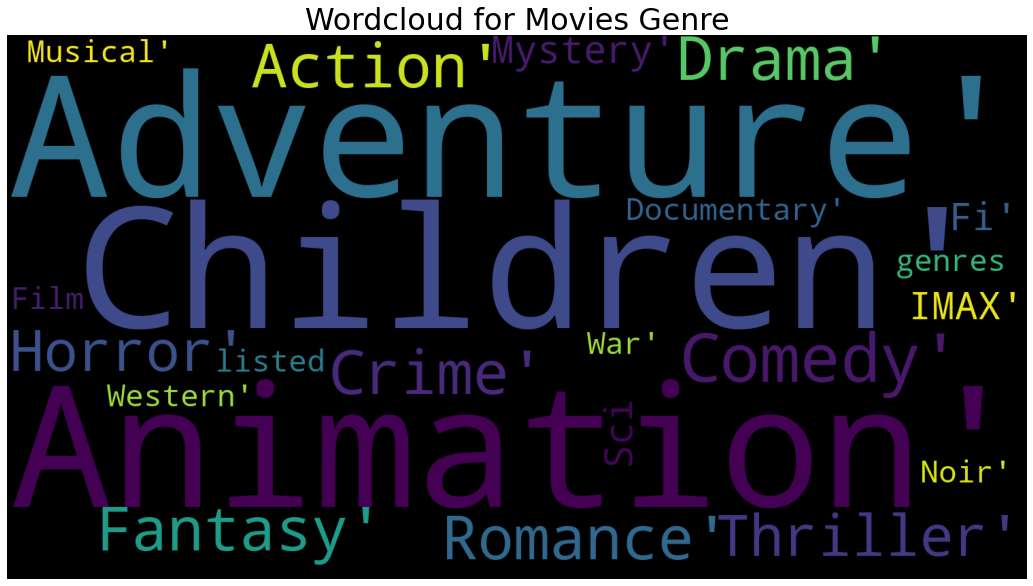

In [8]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('Wordcloud for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

In [9]:
movie_title=[]
for title in movies_df.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title) 

wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2,min_word_length=3).generate(movie_title)

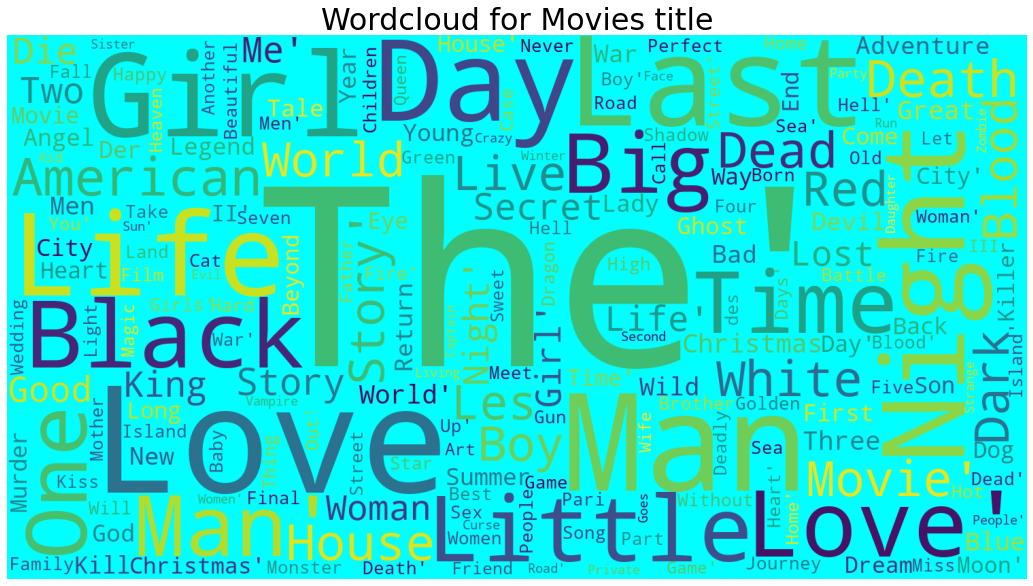

In [10]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('Wordcloud for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

In [11]:
def match_genre(row, genre):
  return 1 if genre in row['genres'] else 0 

for i in genre_list:
  movies_df[i] = movies_df.apply(lambda row: match_genre(row, i), axis=1)
movies_df.head()

,movieId,title,genres,Comedy,Western,Crime,War,Romance,Drama,Mystery,...,Adventure,Documentary,Action,(no genres listed),Animation,Horror,Film-Noir,Musical,Thriller,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Comedy    				16870
Western    				1399
Crime    				5319
War    				1874
Romance    				7719
Drama    				25606
Mystery    				2925
Sci-Fi    				3595
Children    				2935
Fantasy    				2731
Adventure    				4145
Documentary    				5605
Action    				7348
(no genres listed)    				5062
Animation    				2929
Horror    				5989
Film-Noir    				353
Musical    				1054
Thriller    				8654
IMAX    				195


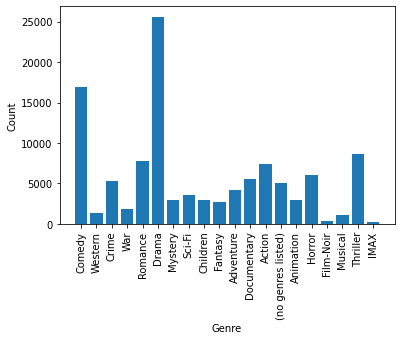

In [12]:
#Movie Count of each genre
x={}
for i in movies_df.columns[3:]:
    x[i]=movies_df[i].value_counts()[1]
    print("{}    \t\t\t\t{}".format(i,x[i]))

plt.bar(height=x.values(),x=x.keys())
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [13]:
#Extracting the year from the Title
movies_df['Year'] = movies_df['title'].str.extract('\((\d{4})\)',expand = False)
movies_df['Year']


0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
62418    2018
62419    2001
62420    2018
62421    2001
62422    1962
Name: Year, Length: 62423, dtype: object

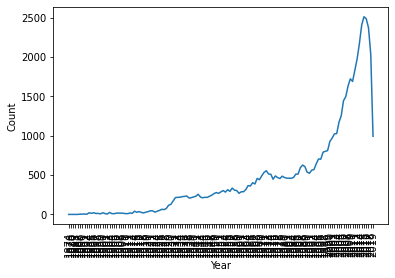

Max No.of Movies Relesed = 2513
Year = 2015


count     135.000000
mean      459.355556
std       581.177234
min         1.000000
25%        33.000000
50%       279.000000
75%       529.000000
max      2513.000000
Name: title, dtype: float64

In [14]:
# No.of Movies each Year corresponding to its Year
plt.plot(movies_df.groupby('Year').title.count())
plt.xticks(rotation=90)

plt.xlabel('Year')
plt.ylabel('Count')
plt.show()
a=movies_df.groupby('Year').title.count()
print('Max No.of Movies Relesed =',a.max())
for i in a.index:
    if a[i] == a.max():
        print('Year =',i)
a.describe()

In [15]:
# Movies and ratings merge
movies_ratings_df = pd.merge(movies_df, rating_df, on="movieId")
movies_ratings_df.head()

,movieId,title,genres,Comedy,Western,Crime,War,Romance,Drama,Mystery,...,Animation,Horror,Film-Noir,Musical,Thriller,IMAX,Year,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1995,2,3.5,1141415820
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1995,3,4.0,1439472215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1995,4,3.0,1573944252
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1995,5,4.0,858625949
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1995,8,4.0,890492517
